In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib widget

In [4]:
def connect(H):
    n, m = H.shape
    H[0, m - 1] = H[n - 1, 0] = -1
    return H

In [74]:
def spectrum(e):
    plt.subplot(131)
    plt.plot(e)
    plt.subplot(132)
    plt.plot(e[e < 0], "+")
    plt.subplot(133)
    plt.plot(e[-20:], "+")

In [6]:
def solve(H):
    e, v = LA.eig(H)
    v = v[:, np.argsort(e)]
    e = e[np.argsort(e)]
    return e, v

In [204]:
def density(o):
    """ Return probability density """
    return abs(o)**2

In [199]:
def collect_density(v, n, m = 0):
    return (abs(v[:, m:n])**2).sum(axis = 1)

In [257]:
def extent(o, i, P = .99):
    """ Return the spatial extent around ith position (symmetric) that contains P of the total probability """
    
    p = density(o)
    S = p[i]
    l = 1
    while (i + l) < m and (i - l) >= 0 and S < P:
        S += p[i + l] + p[i - l]
        l += 1
        
    return 2 * l

In [399]:
def density_slices(r, v, d = 10, n = 5):
    for i in range(n):
        plt.plot(r, collect_density(v, d * (i + 1), d * i))

In [7]:
m = 500
H = np.zeros( (m, m) )

In [8]:
H

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
for i in range(m):
    H[i, i] = 2
    H[i, (i - 1) % m] = H[i, (i + 1) % m] = -1
    
H[0, m - 1] = H[m - 1, 0] = 0

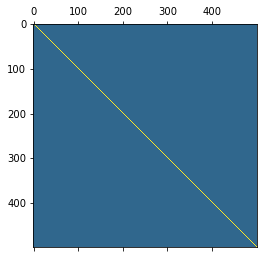

In [10]:
plt.matshow(H)

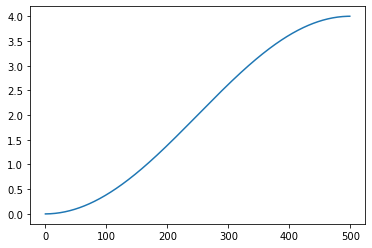

In [163]:
e, v = solve(H)
plt.plot(sorted(e))

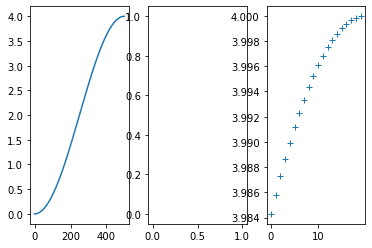

In [164]:
spectrum(e)

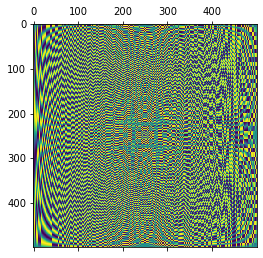

In [165]:
plt.matshow(v[:, np.argsort(e)])

In [271]:
def pev(r, v, n, eps = 1e-2):

    p = np.abs(v[:, n])**2
    plt.plot(r, p * max(abs(v[:, n])) / max(p), '-')
    
    plt.plot(r, v[:, n], "+")
    s = r[p > eps * p.mean()]
    plt.xlim(s[0], s[-1])
    

# $\frac{1}{r}$ Potential

In [173]:
def V(r, f = 1e-1):
    return -1 / (f + abs(r))

def add_cation(H, r, e, k):
    return H + e * np.diag(V(r - k))

In [174]:
r = np.linspace(-2, 2, m)

In [231]:
k = 0
Hk = add_cation(H, r, .05, k)

In [232]:
Hk = connect(Hk)

In [244]:
ek, vk = solve(Hk)

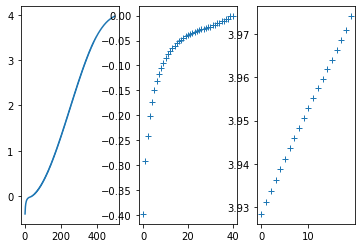

In [234]:
spectrum(ek)

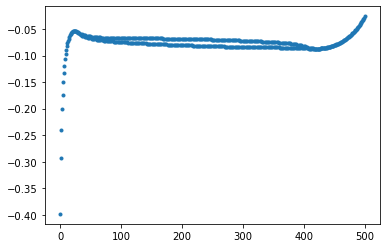

In [441]:
k = 2 * (1 - np.cos(np.linspace(0, np.pi, m)))
#plt.plot(ek)
#plt.plot(k)
plt.plot(ek - k, '.')
#plt.ylim(-.075, -.055)

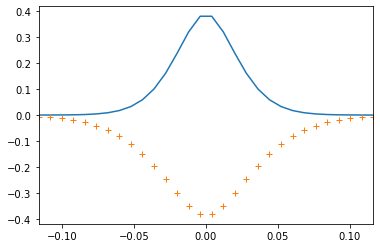

In [442]:
pev(r, vk, 0)

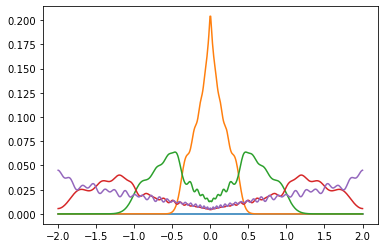

In [443]:
D = 10
for i in range(5):
    plt.plot(r, collect_density(vk, D * i, D * (i - 1)))

# Dihydrogen Cation

In [444]:
def add_cations(H, r, e, ks):
    for k in ks:
        H = add_cation(H, r, e, k)
    return H

In [445]:
k1 = .7
k2 = -.75
Hkk = add_cations(H, r, .05, [k1, k2])

In [446]:
Hkk = connect(Hkk)

In [447]:
ekk, vkk = solve(Hkk)

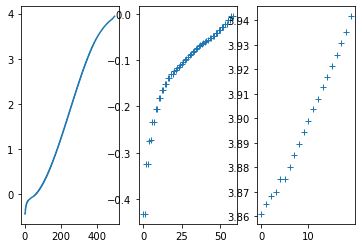

In [448]:
spectrum(ekk)

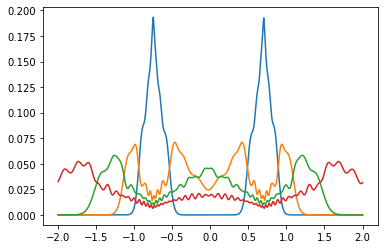

In [449]:
density_slices(r, vkk, 12, 4)

## Compare Orbitals & Density in Single & Double Cations

Single site densities from the double cation solution agree extremely well with the single cation solutions.

Text(0.5, 1.0, 'First State')

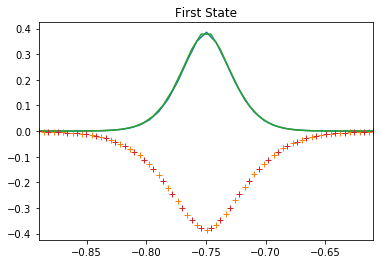

In [436]:
pev(r, vkk, 0, eps = 1e-3)
pev(r - .75, vk, 0, eps = 1e-3)
plt.title('First State')

Text(0.5, 1.0, 'Second State')

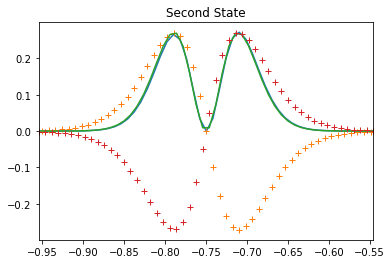

In [437]:
pev(r, vkk, 3, eps = 1e-3)
pev(r - .75, vk, 1, eps = 1e-3)
plt.title('Second State')

Text(0.5, 1.0, 'Third State')

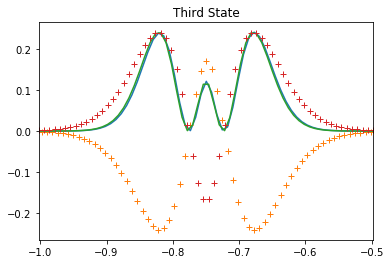

In [440]:
pev(r, vkk, 4, eps = 1e-3)
pev(r - .75, vk, 2, eps = 1e-3)
plt.title('Third State')

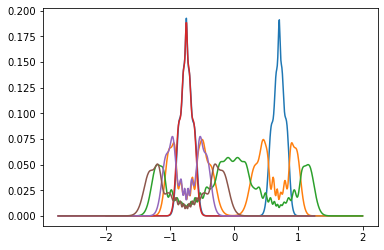

In [455]:
density_slices(r, vkk, 10, 3)
#plt.figure()
density_slices(r - .75, vk, 5, 3)

## Energy over Distance Experiments

In [350]:
L = []
L10 = []
p0 = []
ds = np.linspace(.01, 1, 25)
for d in ds:
    HH = add_cations(H, r, .05, [-d/2, d/2])
    e, v = solve(HH)
    L.append(e[0])
    L10.append(e[:2].sum())
    p0.append(v[:, 0])

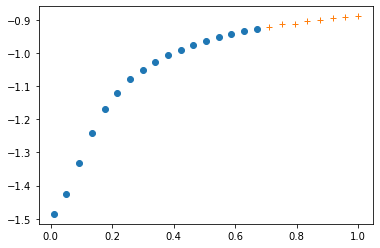

In [351]:
plt.plot(ds[:17], L10[:17], "o")
plt.plot(ds[17:], L10[17:], "+")

Text(0.5, 1.0, '0.67')

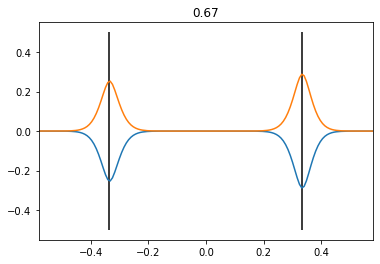

In [346]:
i = 16
plt.plot(r, p0[i])
p = abs(p0[i])
plt.plot(r, p)
s = r[p > 1e-4 * p.mean()]
plt.xlim(s[0], s[-1])
plt.vlines([ds[i]/2, -ds[i]/2], -.5, .5)
plt.title(ds[i])

In [32]:
r[1]-r[0]

0.008016032064128265

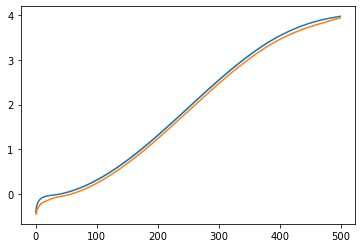

In [33]:
plt.plot(ek)
plt.plot(ekk)

# Discussion
+ visualize wave functions of single cation and introduce bound states
+ (discuss symmetric solutions)
+ add second cation:
    + hypothesize over what solutions to expect
    + calculate and compare single cation eigenfunctions to every other double cation eigenfunctions
    + introduce frozen-core
+ extra credit: https://en.wikipedia.org/wiki/Particle_in_a_spherically_symmetric_potential#Relationship_with_1-D_Schr%C3%B6dinger_equation

# Radially Symmetric Potentials

In [37]:
def Vr(r, l = 0, f = 1e-4):
    return V(r, f = f) + l * (l + 1) / (f + r**2)

In [329]:
rr = np.linspace(0, 5, m)
Hr = H + 0.05 * np.diag(Vr(rr, l = 2, f = 1e-2))
er, vr = solve(Hr)

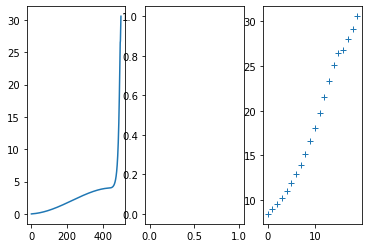

In [330]:
spectrum(er)

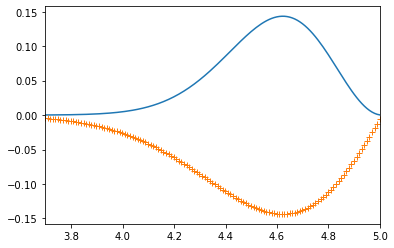

In [333]:
pev(rr, vr, 0)